In [1]:
import numpy as np
import numpy.linalg as nl
import scipy.linalg as sl
import scipy.integrate as si
import matplotlib.pyplot as plt

In [2]:
def xj(J, L):
    h = L/J
    return np.arange(-J, J+1) * h

In [3]:
# function we are trying to approximate
def f(x, choice=4):
    if choice == 0:
        # dimensionless quantum harmonic oscillator potential
        return 0.5 * x**2
    elif choice == 1:
        # symmetric double well potential
        return 0.0025 * (x ** 2 - 25) ** 2
    elif choice == 2:
        # asymmetric double well potential
        return 0.0003 * ((x - 3) ** 4 + 10 * (x - 5) ** 3)
    elif choice == 3:
        # soft coulomb potential
        return -1 / np.sqrt(x ** 2 + 0.25)
    elif choice == 4:
        # a complicated function made by Harish
        return np.cos(x**2) - x*np.sin(x)
    else:
        print('Function v(x, choice=0): Did not recognise your input for choice.')

In [4]:
# vectorized version of Gaussian basis function
# Gaussian centered at grid point j*h with shape parameter alpha
# z_{ij} = x_i - j*h
def gbm(z, alpha):
    return np.exp(-alpha * z**2)

In [24]:
# function for computing the L2 error given J
def loopfn(J, L, alpha):
    # make vector of xj values
    xjvec = xj(J, L)

    # make arrays that can be used in vectorized evaluations
    # rows are x_i and columns are j*h
    xj1, xj2 = np.meshgrid(xjvec, xjvec, sparse=True, indexing='ij')

    # make Gaussian basis matrix.
    # We want {gbmat @ gbcfs}_i = vtrue_i, so each row in gbmat is
    # the Gaussian basis representation of x_i
    # rows are x_i and columns are j*h
    gbmat = gbm(xj1 - xj2, alpha)

    # compute vector of the function evaluated on
    # the Gaussian basis grid (needed for computing
    # basis coefficients)
    fxjtrue = f(xjvec)

    # solve gbmat @ gbcfs = fxjtrue
    # to compute Gaussian basis coefficients
    # gbmat must be a square matrix
    gbcfs = sl.solve(gbmat, fxjtrue, assume_a='sym')

    # reconstruct function from coefficients
    fxjprdt = gbmat @ gbcfs

    # function representation of L2 norm
    def integrand(x):
        xm, xjm = np.meshgrid(x, xjvec, indexing='ij', sparse=True)

        # when more than one x point is evaluated, x forms the rows
        # and xj forms the columns
        gatx = gbm(xm - xjm, alpha)

        return np.square(gatx @ gbcfs - f(x))

    # integrate to get the square of the L2 error
    l2errsq, _ = si.quadrature(integrand, -L, L, maxiter=500, tol=1e-8, rtol=1e-8)

    return xjvec, fxjtrue, fxjprdt, gbcfs, L/J, np.sqrt(l2errsq)

/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_88248/2245142916.py:24: LinAlgWarning: Ill-conditioned matrix (rcond=2.19607e-20): result may not be accurate.
  gbcfs = sl.solve(gbmat, fxjtrue, assume_a='sym')


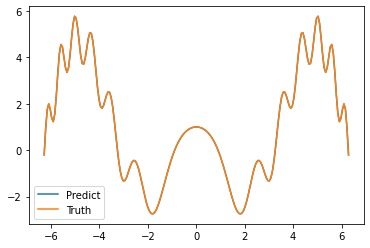

L2 Error: 0.0001399555132323139
h value: 0.06283185307179587


In [31]:
myalpha = 3.0
bigL = 2*np.pi
xjvec, fxjtrue, fxjprdt, gbcfs, hval, l2err = loopfn(J=100, L=bigL, alpha=myalpha)

# plot the truth vs reconstruction
plt.plot(xjvec, fxjprdt, label='Predict')
plt.plot(xjvec, fxjtrue, label='Truth')
plt.legend()
plt.show()

print(f'L2 Error: {l2err}', f'h value: {hval}', sep='\n')

In [48]:
# compute L^\infty error

# Grid of x_i points should be fine enough that the answer is stable
# (i.e. further refinement does not appreciably change the answer)
# also the answer should be reasonably accurate, that is, if
# you graph |fapprox(x) - f(x)| vs. x that the maximum isn't
# obviously different from the L^\infty error

def Linfty(thisn, L, xjvec, gbcfs, alpha):
    xivec = np.linspace(-L, L, thisn)
    fxitrue = f(xivec)
    # rows are x_i and columns are j*h
    xi1, xi2 = np.meshgrid(xivec, xjvec, sparse=True, indexing='ij')
    gbmatfine = gbm(xi1 - xi2, alpha)
    fxiprdt = gbmatfine @ gbcfs
    absdiffvec = np.abs(fxiprdt - fxitrue)
    return xivec, absdiffvec, np.max(absdiffvec)

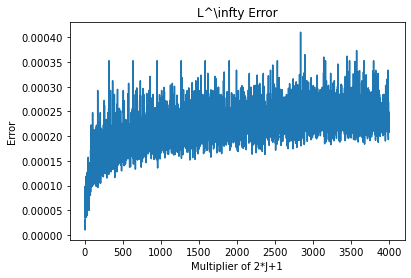

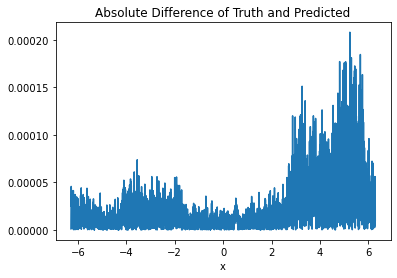

In [52]:
nvec = range(1, 4000)
Linftyrst = np.zeros_like(nvec, dtype=float)
for n in nvec:
    lastxivec, lastabsdiffvec, Linftyrst[n-1] = Linfty(nvec[n-1], bigL, xjvec, gbcfs, myalpha)

plt.plot(Linftyrst)
plt.title('L^\infty Error')
plt.xlabel('Multiplier of 2*J+1')
plt.ylabel('Error')
plt.show()

plt.plot(lastxivec, lastabsdiffvec)
plt.title('Absolute Difference of Truth and Predicted')
plt.xlabel('x')
plt.show()

---

In [21]:
jspace = np.arange(5, 60)
lenjspace = len(jspace)
hvec = np.zeros(lenjspace, dtype=float)
errvec = np.zeros(lenjspace, dtype=float)
bigL = 2*np.pi

# main loop
for i in range(lenjspace):
    print(f'Computing {i+1} of {lenjspace}')
    _, _, _, errvec[i], hvec[i] = loopfn(J=jspace[i], L=bigL, alpha=3.0)


Computing 1 of 55
Computing 2 of 55
Computing 3 of 55
Computing 4 of 55
Computing 5 of 55
Computing 6 of 55
Computing 7 of 55
Computing 8 of 55
Computing 9 of 55
Computing 10 of 55
Computing 11 of 55
Computing 12 of 55
Computing 13 of 55
Computing 14 of 55
Computing 15 of 55
Computing 16 of 55
Computing 17 of 55
Computing 18 of 55
Computing 19 of 55
Computing 20 of 55
Computing 21 of 55
Computing 22 of 55
Computing 23 of 55
Computing 24 of 55
Computing 25 of 55
Computing 26 of 55
Computing 27 of 55
Computing 28 of 55
Computing 29 of 55
Computing 30 of 55
Computing 31 of 55
Computing 32 of 55
Computing 33 of 55
Computing 34 of 55
Computing 35 of 55
Computing 36 of 55
Computing 37 of 55
Computing 38 of 55
Computing 39 of 55
Computing 40 of 55
Computing 41 of 55
Computing 42 of 55
Computing 43 of 55
Computing 44 of 55
Computing 45 of 55
Computing 46 of 55
Computing 47 of 55
Computing 48 of 55
Computing 49 of 55
Computing 50 of 55
Computing 51 of 55
Computing 52 of 55
Computing 53 of 55
Co

/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_77161/336894881.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=4.56661e-17): result may not be accurate.
  gbcfs = sl.solve(gbmat, fxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_77161/336894881.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=1.90134e-17): result may not be accurate.
  gbcfs = sl.solve(gbmat, fxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_77161/336894881.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=3.42011e-18): result may not be accurate.
  gbcfs = sl.solve(gbmat, fxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_77161/336894881.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=2.57988e-18): result may not be accurate.
  gbcfs = sl.solve(gbmat, fxjtrue, assume_a='sym')
/var/folders/pz/wy3lg_ps0fg986p2nzxcqlf00000gp/T/ipykernel_77161/336894881.py:18: LinAlgWarning: Ill-conditioned matrix 

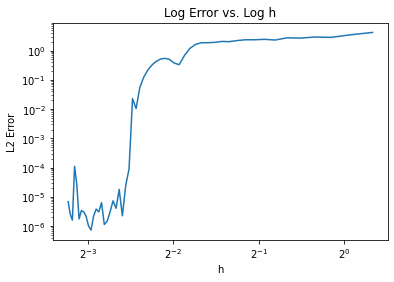

In [22]:
plt.loglog(hvec, errvec)
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.title('Log Error vs. Log h')
plt.xlabel('h')
plt.ylabel('L2 Error')
plt.show()
#plt.savefig('./order-of-accuracy-results/error-vs-h-plot.pdf')